In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
df = pd.read_csv(r"advertising.csv")

In [58]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [60]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [61]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [62]:
q = df["TV"].quantile(0.25)

In [63]:
def outlierfiinding(df,cols):
    q1  = df[cols].quantile(0.25)
    q3 = df[cols].quantile(0.75)
    
    IQR  = q3 - q1
    
    low = q1 - (1.5*IQR)
    high = q3 + (1.5*IQR)
    
    oulier_cols = df[(df[cols] < low) | (df[cols] > high)]
    
    return oulier_cols

In [64]:
outlierfiinding(df,"TV")

,TV,Radio,Newspaper,Sales


In [65]:
outlierfiinding(df,"Radio")

,TV,Radio,Newspaper,Sales


In [66]:
outlierfiinding(df,"Newspaper")

,TV,Radio,Newspaper,Sales
16,67.8,36.6,114.0,12.5
101,296.4,36.3,100.9,23.8


In [67]:
df.drop(index=[16,101],axis=0,inplace =True)

In [68]:
outlierfiinding(df,"Newspaper")

,TV,Radio,Newspaper,Sales


In [69]:
outlierfiinding(df,"Sales")

,TV,Radio,Newspaper,Sales


C:\Users\manil\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


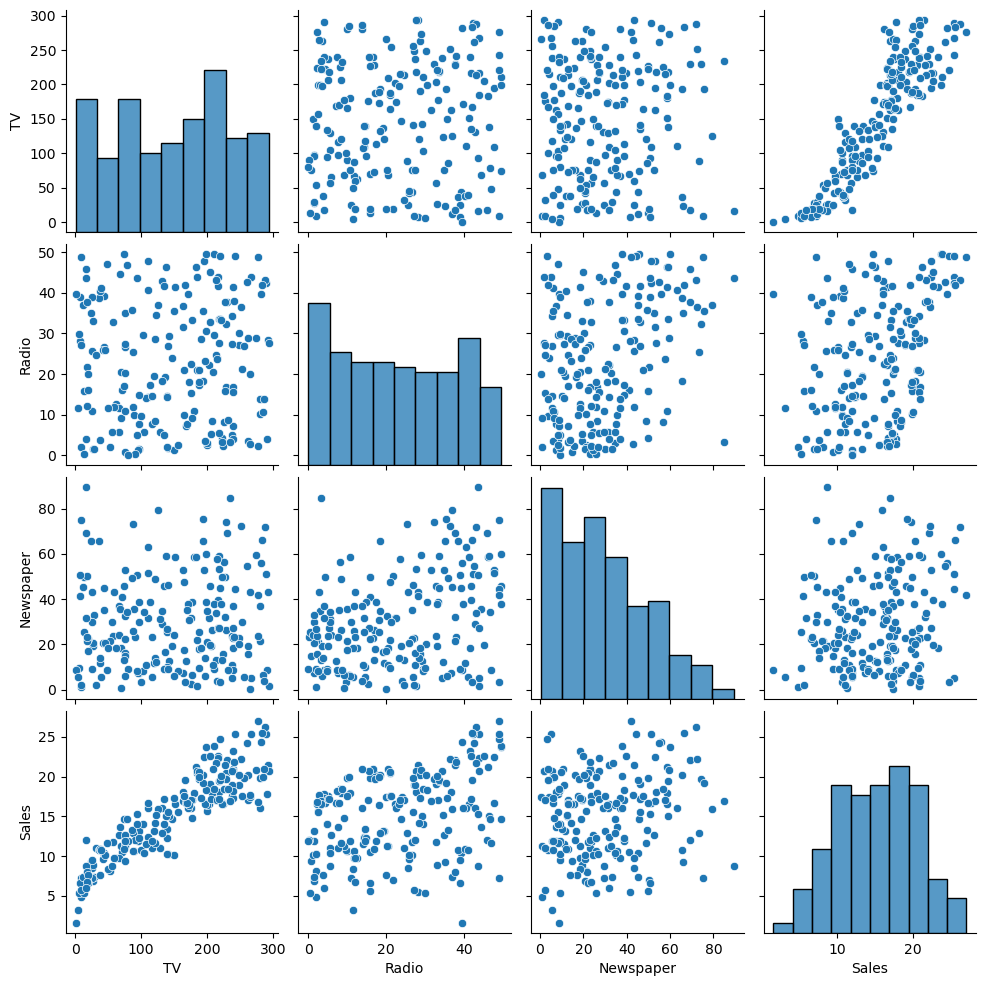

In [70]:
#  ploting data points

sns.pairplot(df)
plt.show()

In [71]:
X = df[['TV', 'Radio', 'Newspaper']]

In [72]:
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [73]:
y = df["Sales"]

In [74]:
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 198, dtype: float64

In [75]:
from sklearn.linear_model import LinearRegression

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.20,random_state=9)

In [78]:
Xtrain.shape,Xtest.shape,ytrain.shape,ytest.shape

((158, 3), (40, 3), (158,), (40,))

In [79]:
from sklearn.preprocessing import StandardScaler

In [80]:
ss = StandardScaler()

In [81]:
ss.fit(Xtrain)

StandardScaler()

In [82]:
X_train = ss.transform(Xtrain)

In [83]:
X_test = ss.transform(Xtest)

In [84]:
from sklearn.linear_model import LinearRegression

In [85]:
lreg = LinearRegression()

In [86]:
lreg.fit(X_train,ytrain)

LinearRegression()

In [87]:
lreg.score(X_test,ytest)

0.9249760695806692

In [96]:
ytrain_pred = lreg.predict(X_train)

In [97]:
from sklearn import metrics

In [98]:
print("MAE:    ", metrics.mean_absolute_error(ytrain, ytrain_pred))
print("MSE:    ",metrics.mean_squared_error(ytrain, ytrain_pred))
print("RMSE:   ",np.sqrt(metrics.mean_squared_error(ytrain, ytrain_pred)))

MAE:     1.2711187926659036
MSE:     2.883746249103148
RMSE:    1.6981596653740036


In [99]:
ytest_pred = lreg.predict(X_test)

In [100]:
from sklearn import metrics

In [102]:
print("MAE:    ", metrics.mean_absolute_error(ytest, ytest_pred))
print("MSE:    ",metrics.mean_squared_error(ytest, ytest_pred))
print("RMSE:   ",np.sqrt(metrics.mean_squared_error(ytest, ytest_pred)))

MAE:     1.1435411135255973
MSE:     2.138346600698285
RMSE:    1.4623086543880828
